In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Supermart Grocery Sales - Retail Analytics Dataset.csv")
df.sample(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
1912,OD1913,Hafiz,Oil & Masala,Edible Oil & Ghee,Perambalur,12/22/2017,West,1910,0.27,592.10,Tamil Nadu
9782,OD9783,Komal,Snacks,Cookies,Karur,3/29/2017,Central,2450,0.21,1102.50,Tamil Nadu
5189,OD5190,Sheeba,Food Grains,Dals & Pulses,Namakkal,3/31/2015,Central,2150,0.13,322.50,Tamil Nadu
1214,OD1215,Anu,"Eggs, Meat & Fish",Mutton,Kanyakumari,1/29/2018,Central,2290,0.17,938.90,Tamil Nadu
8053,OD8054,Veronica,"Eggs, Meat & Fish",Chicken,Theni,11/21/2016,West,745,0.35,111.75,Tamil Nadu


In [3]:
# Dropping Order ID Column
df.drop(["Order ID"], axis=1, inplace=True)

In [4]:
# Shape of the DataFrame
df.shape

# Size of the DataFrame
df.size

# Index of the DataFrame
df.index

# Columns in the DataFrame
df.columns

# Info of the DataFrame
df.info()

# Null values in the DataFrame
df.isna().sum()

# Unique values in Customer Name Column
df["Customer Name"].unique()

# Unique values in Category Column
df["Category"].unique()

# Unique values in Sub Category Column
df["Sub Category"].unique()

# Unique values in City Column
df["City"].unique()

# Unique values in Region Column
df["Region"].unique()

# Sample Data from Order Date Column
df["Order Date"].sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  9994 non-null   object 
 1   Category       9994 non-null   object 
 2   Sub Category   9994 non-null   object 
 3   City           9994 non-null   object 
 4   Order Date     9994 non-null   object 
 5   Region         9994 non-null   object 
 6   Sales          9994 non-null   int64  
 7   Discount       9994 non-null   float64
 8   Profit         9994 non-null   float64
 9   State          9994 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 780.9+ KB


,Order Date
5829,10/18/2015
7867,09-04-2016
6565,12/19/2016
8065,6/20/2016
798,12/24/2016


In [5]:
# Converting Order Date Column to Pandas DateTime Format
# By using (format="mixed") because Order Date has mixed format data (8/27/2016, 06-11-2016 etc.)
df["Order Date"] = pd.to_datetime(df["Order Date"], format="mixed")

# Sample Data from Order Date Column after transformation
df["Order Date"].sample(5)

,Order Date
7561,2016-11-12
464,2017-04-22
9003,2017-12-29
4628,2018-12-01
7472,2015-08-17


In [6]:
# Extracting Year from Order Date Column
df["Year"] = df["Order Date"].dt.year

# Extracting Month Names from Order Date Column
df["Month"] = df["Order Date"].dt.month_name()

# Extracting Date from Order Date Column
df["Date"] = df["Order Date"].dt.day

In [7]:
# We are extracting Discount Amount from Discount Percentage
# By using formula : CP = (SP*100/100-Discount%)
# And then we are subtracting CP from SP to get Discount Amount
df["Discount_Amt"] = round((df["Sales"]*100)/(100-(df["Discount"]*100))).astype(int) - df["Sales"]

In [8]:
# Dropping Order Date Column
df.drop(["Order Date","Discount"], axis=1, inplace=True)

In [47]:
# Final DataFrame
df.head(5)

df.drop(["Customer Name"], axis=1, inplace=True)

In [48]:
# Count of products sold in each Category
df["Category"].value_counts()

,count
Category,
Snacks,1514
"Eggs, Meat & Fish",1490
Fruits & Veggies,1418
Bakery,1413
Beverages,1400
Food Grains,1398
Oil & Masala,1361


In [49]:
# Count of products sold in each Sub Category
df["Sub Category"].value_counts()

# Total sale in each Category
df.groupby(["Category"])["Sales"].sum().sort_values(ascending=False)

# Total sale in each Sub Category
df.groupby(["Sub Category"])["Sales"].sum().sort_values(ascending=False)

,Sales
Sub Category,
Health Drinks,1051439
Soft Drinks,1033874
Cookies,768213
Breads & Buns,742586
Noodles,735435
Chocolates,733898
Masalas,697480
Cakes,685612
Biscuits,684083


In [50]:
# Count of products sold in each City
df["City"].value_counts()

# Count of products sold in each Region
df["Region"].value_counts()

# As we have only 1 sales data for North region
# We can remove it for a balance data overall
df = df[df["Region"] != "North"]

# Count of products sold in each Region after transformation
df["Region"].value_counts()

,count
Region,
West,3203
East,2848
Central,2323
South,1619


In [51]:
# Count of products sold each Year
df["Year"].value_counts()

# Count of products sold each Month
df["Month"].value_counts()

# Count of products sold each Date
df["Date"].value_counts()

,count
Date,
20,398
21,396
2,379
5,366
3,365
26,365
11,359
23,358
8,355


In [52]:
# Total sale in each Region
df.groupby(["Region"])["Sales"].sum().sort_values(ascending=False)

,Sales
Region,
West,4798743
East,4248368
Central,3468156
South,2440461


In [53]:
# Total sale in each City
df.groupby(["City"])["Sales"].sum().sort_values(ascending=False)

,Sales
City,
Kanyakumari,706764
Vellore,675296
Bodi,667177
Tirunelveli,659812
Perambalur,659738
Salem,657093
Pudukottai,653179
Tenkasi,643652
Karur,642273


In [54]:
# Total sale in each Month
df.groupby(["Month"])["Sales"].sum().sort_values(ascending=False)

,Sales
Month,
November,2192670
December,2088076
September,2064266
October,1243289
July,1089385
May,1086920
June,1057808
March,1053980
August,1046807


In [55]:
# Total sale in each Year
df.groupby(["Year"])["Sales"].sum().sort_values(ascending=False)

,Sales
Year,
2018,4977512
2017,3870658
2016,3131959
2015,2975599


In [56]:
# Sale of Different Category Products Month Wise

df.pivot_table(index="Month", columns="Category", values="Sales", aggfunc="sum")


Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
Month,,,,,,,
April,123181,151748,143530,128790,138084,157369,155751
August,162277,152976,149694,182850,140885,124935,133190
December,298939,265806,344238,291656,311754,270309,305374
February,54701,60188,58331,62983,74313,62044,83542
January,69139,91775,74158,79531,80753,95324,87292
July,168795,137856,151179,166926,162689,149179,152761
June,154397,140633,181754,128165,153431,129080,170348
March,154253,143575,165977,140169,126704,142637,180665
May,135113,163490,173024,143356,152491,182725,136721


In [57]:
# Sale of Different Category Products Region Wise
df.pivot_table(index="Region", columns="Category", values="Sales", aggfunc="sum")

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
Region,,,,,,,
Central,448343,501194,516642,463683,526507,453293,558494
East,588241,577206,677830,598868,564237,622071,619915
South,361385,344666,360963,353069,352162,298859,369357
West,714312,662247,711966,699652,657821,662965,689780


In [58]:
# Profit from Different Category Products Year Wise
df.pivot_table(index="Year", columns="Category", values="Profit", aggfunc="sum")

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
Year,,,,,,,
2015,107567.44,104834.61,126057.88,90837.84,100586.06,105637.64,117007.64
2016,124536.04,110201.14,114208.28,113643.27,118900.21,102656.22,113047.83
2017,122078.77,135179.89,135896.22,149775.58,130630.77,137156.83,142096.88
2018,174338.81,175390.12,191194.84,174905.95,180283.34,152043.32,196026.50


In [59]:
# Percent of total revenue spend on Discounts
amt_spend = int(df["Discount_Amt"].sum()/df["Sales"].sum()*100)
print(f"{amt_spend}% of total revenue was spend on Discounts.")

30% of total revenue was spend on Discounts.


In [60]:
# Setting Plot Style to "ticks"
sns.set_style("ticks")

No. of Products sold in each Category

# **No. of Products sold in each Category**

# **Insights**

• Snacks are the highest selling product in the entire category.

• While, Oil and Masala being the lowest selling product in the entire category.

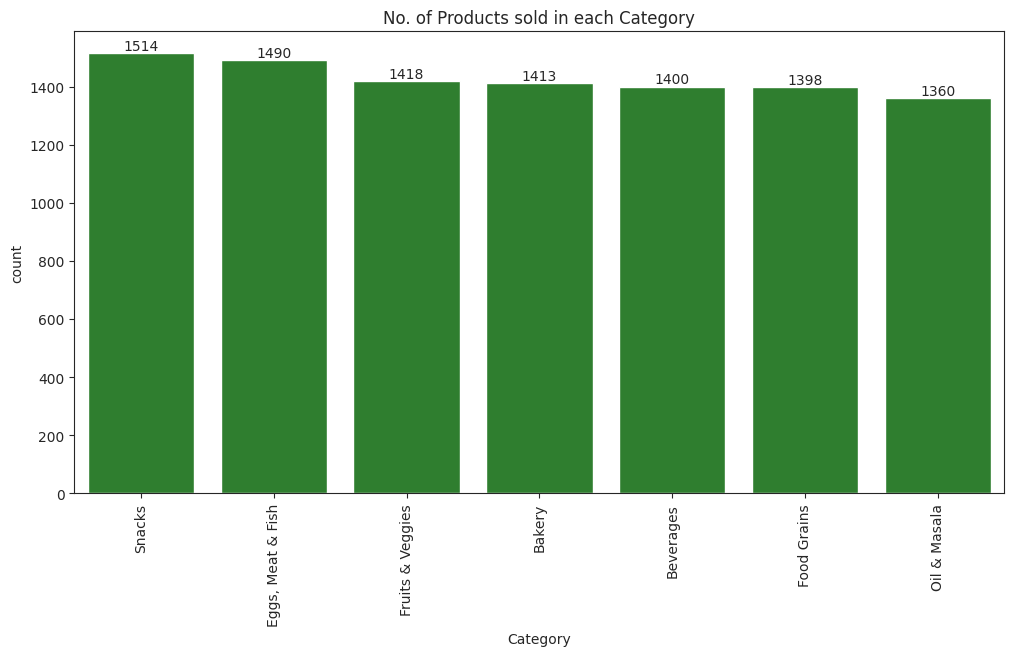

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x="Category", color="#228B22", order=df["Category"].value_counts().index)
ax.set_title("No. of Products sold in each Category")
ax.tick_params(axis="x", rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

# **No. of Products sold in each Sub Category**

# **Insights**

• Health Drinks and Soft Drinks are the top 2 highest selling products in the entire sub category.

• Cookies is the third highest selling product in the entire sub category.

• While, Rice being the lowest selling product in the entire sub category.

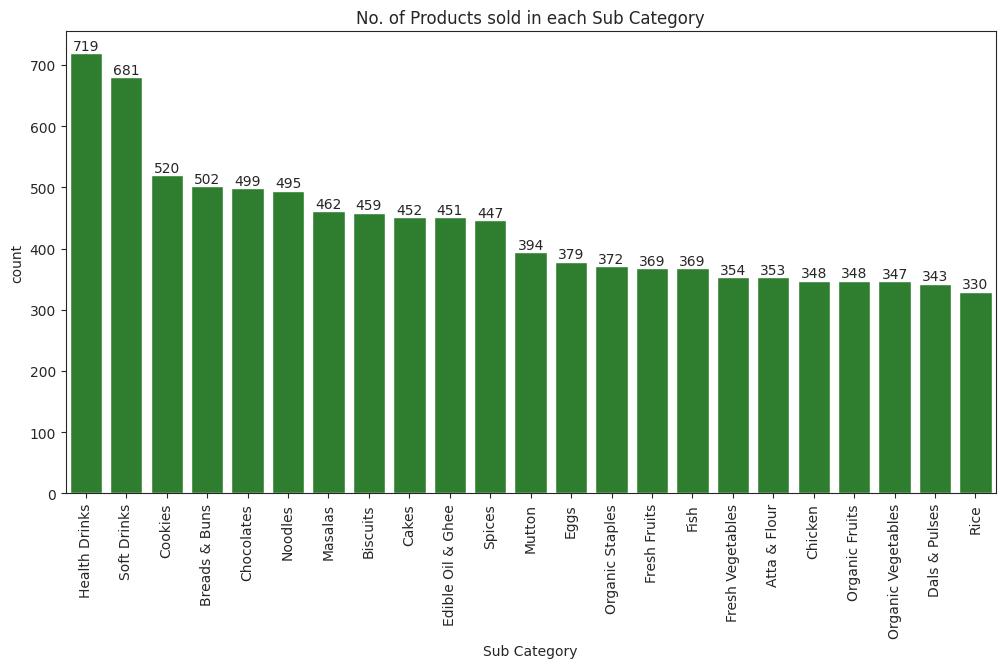

In [62]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x="Sub Category", color="#228B22", order=df["Sub Category"].value_counts().index)
ax.set_title("No. of Products sold in each Sub Category")
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

# No. of Products sold in each **City**

# **Insights**

• Kanyakumari is the city with highest number of sales in whole Tamil Nadu.

• While, Trichy being the city with lowest number of sales in whole Tamil Nadu.

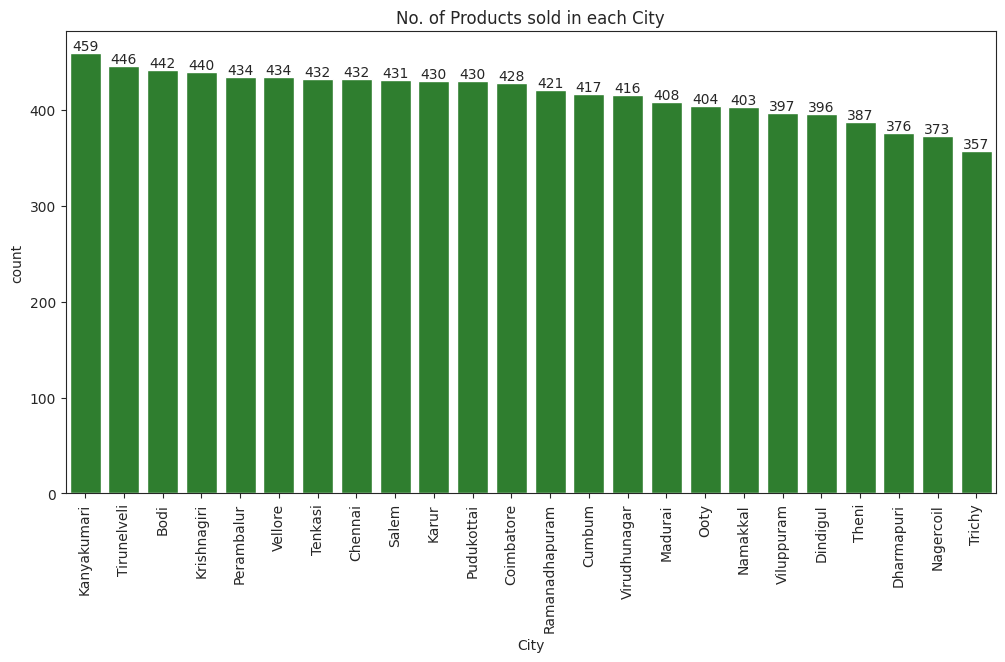

In [63]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x="City", color="#228B22", order=df["City"].value_counts().index)
ax.set_title("No. of Products sold in each City")
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

# **No. of Products sold each Year, Month and Date**

# **Insights**

• 2018 was the year with highest number of sales.

• While, 2015 being the year with lowest number of sales.

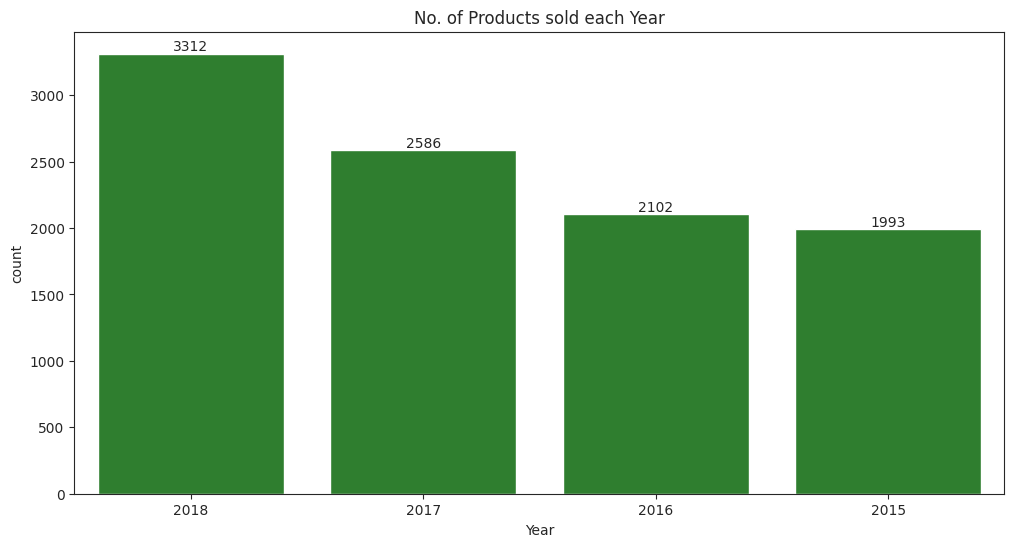

In [64]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x="Year", color="#228B22", order=df["Year"].value_counts().index)
ax.set_title("No. of Products sold each Year")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

# **Insights**

• November is the month with highest number of sales.

• While, February being the month with lowest number of sales.

• High sales are towards the end of the year while low sales are towards the start of the year.

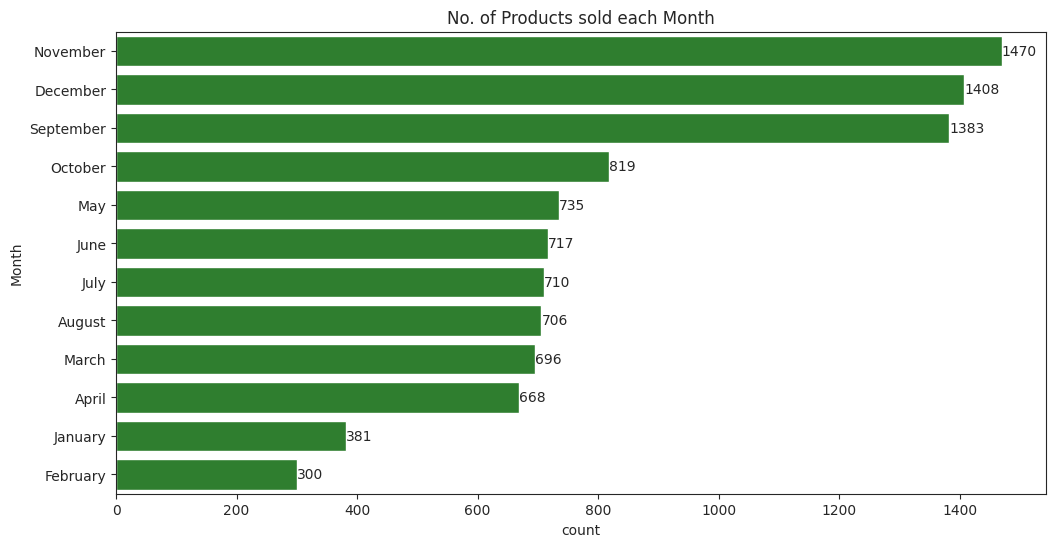

In [65]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, y="Month", color="#228B22", order=df["Month"].value_counts().index)
ax.set_title("No. of Products sold each Month")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

# **Insights**

• 20 and 21 are the dates in each month with highest number of sales.

• While, 31 being the date in each month with lowest number of sales.

• High sales are towards the mid of each month while low sales are towards the end of each month.

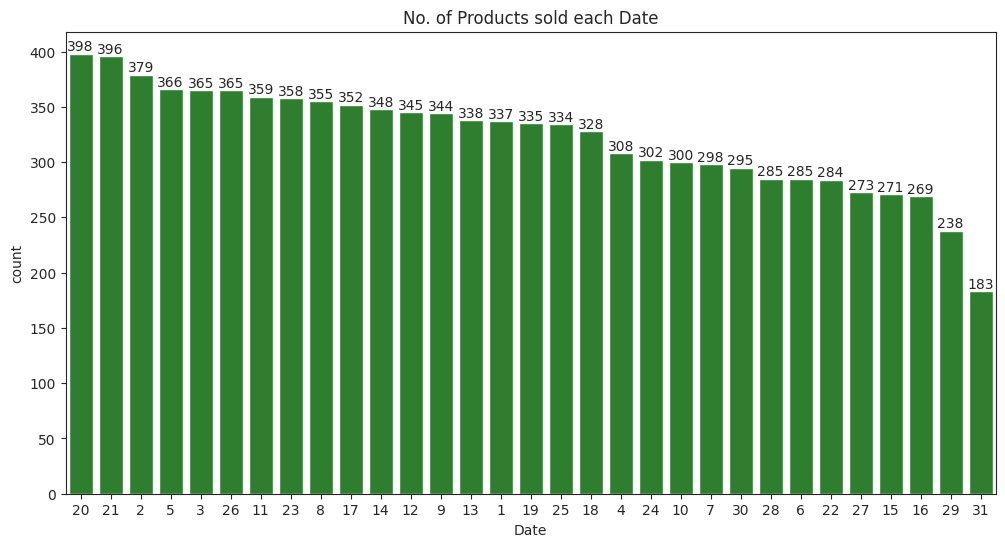

In [66]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x="Date", color="#228B22", order=df["Date"].value_counts().index)
ax.set_title("No. of Products sold each Date")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

# **Total sales in each Category**

## **Insights**

• Eggs, Meat & Fish has the highest number of total sales in the entire category.

• While, Oil and Masala has the lowest number of total sales in the entire category.

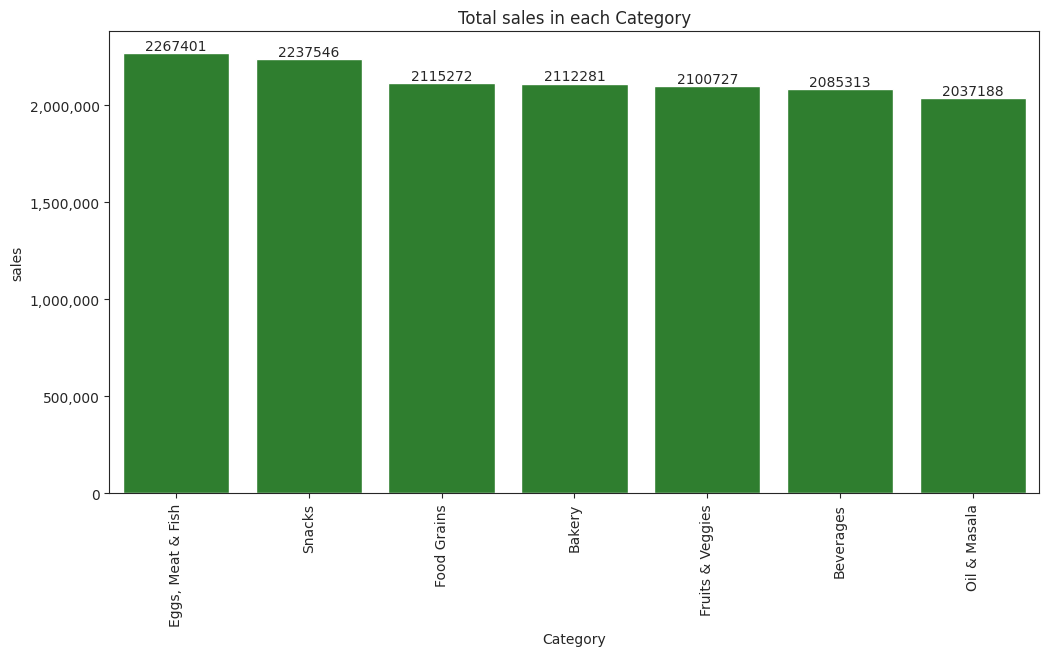

In [67]:
sales_by_category = df.groupby(["Category"])["Sales"].sum().sort_values(ascending=False)

from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values,
            color="#228B22", order=df.groupby(["Category"])["Sales"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('sales')
ax.tick_params(axis="x", rotation=90)
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total sales in each Category")

plt.show()

# **Total sales in each Month**

# **Insights**

• November is the month with the highest number of total sales in each Year.

• While, February is the month with the lowest number of total sales in each Year.

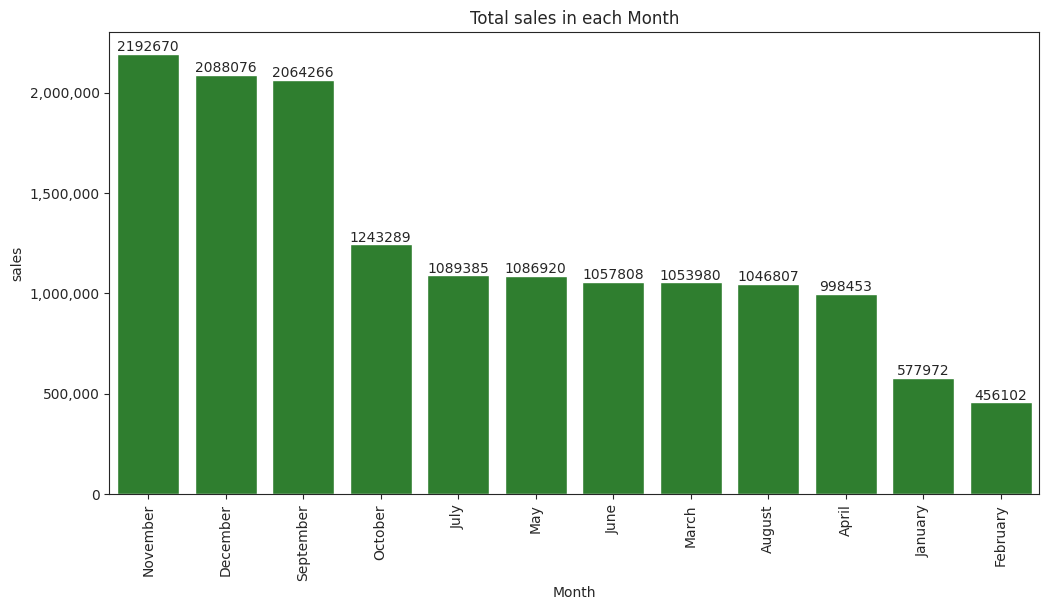

In [68]:
sales_by_month = df.groupby(["Month"])["Sales"].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=sales_by_month.index, y=sales_by_month.values,
            color="#228B22", order=df.groupby(["Month"])["Sales"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('sales')
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total sales in each Month")

plt.show()

# **Total sales in each Year**

# **Insights**

• 2018 was the year with the highest number of total sales.

• While, 2015 being the year with the lowest number of total sales.

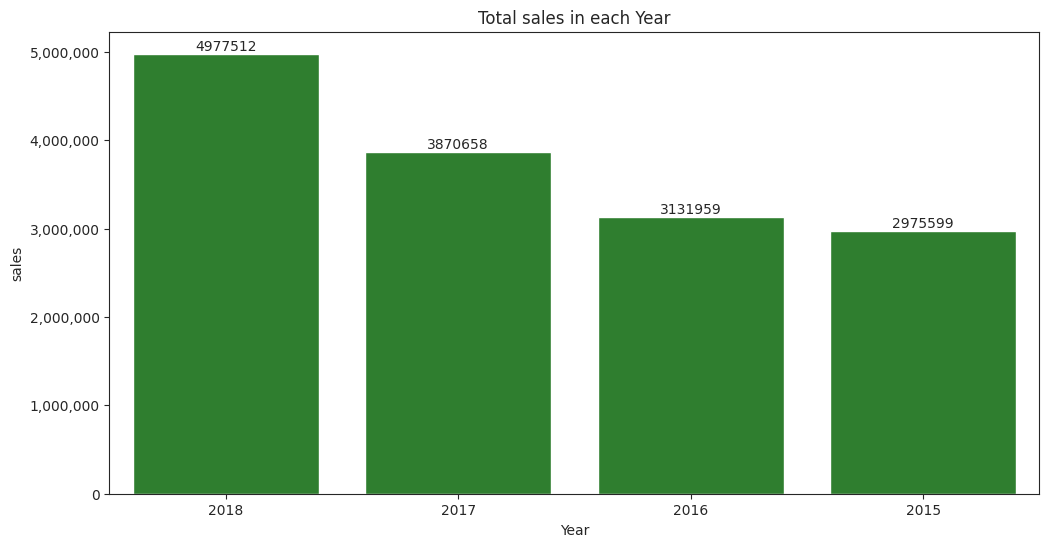

In [69]:
sales_by_year = df.groupby(["Year"])["Sales"].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=sales_by_year.index, y=sales_by_year.values,
            color="#228B22", order=df.groupby(["Year"])["Sales"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('sales')
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total sales in each Year")

plt.show()



# **Total profit in each Category**

# **Insights**

• Snacks was the most profitable category of product in the Supermarket.

• While, Oil & Masala being the least profitable category of product in the Supermarket.

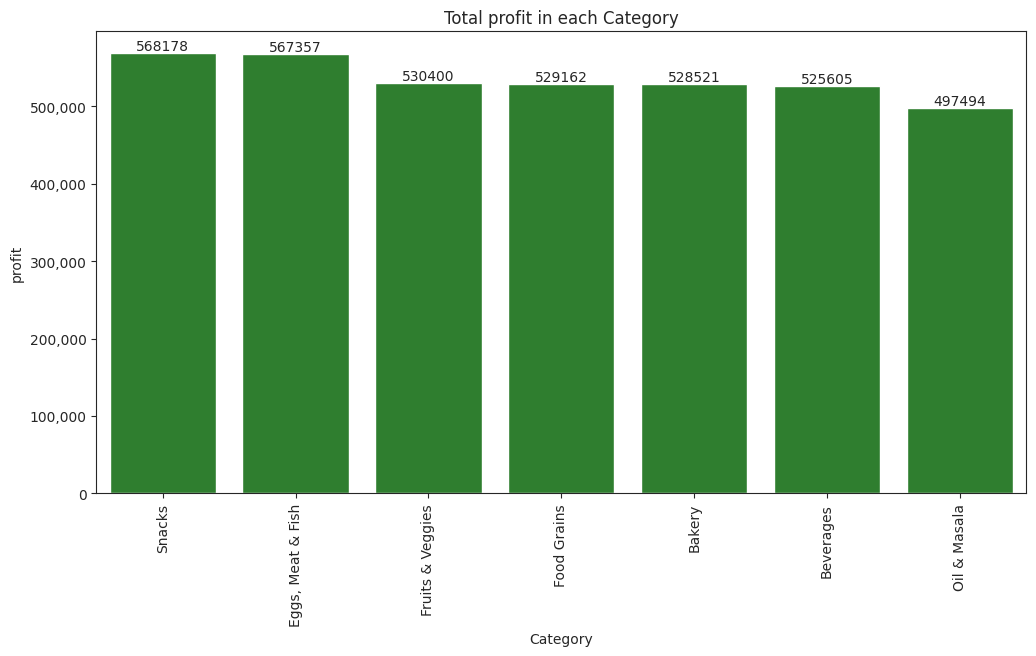

In [70]:
profit_by_category = df.groupby(["Category"])["Profit"].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=profit_by_category.index, y=profit_by_category.values,
            color="#228B22", order=df.groupby(["Category"])["Profit"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('profit')
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total profit in each Category")

plt.show()

# **Total profit in each Sub Category**

# **Insights**

• Health Drinks & Soft Drinks are the most profitable sub category of products in the Supermarket.

• While, Chicken being the least profitable sub category of product in the Supermarket.

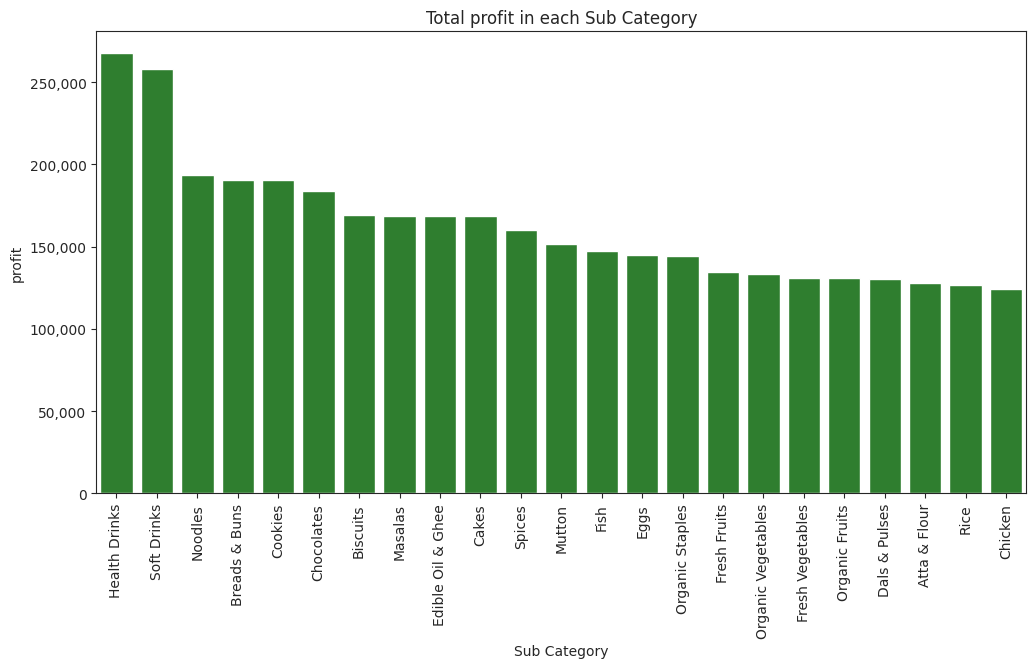

In [71]:
profit_by_sub_category = df.groupby(["Sub Category"])["Profit"].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=profit_by_sub_category.index, y=profit_by_sub_category.values,
            color="#228B22", order=df.groupby(["Sub Category"])["Profit"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('profit')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Total profit in each Sub Category")

plt.show()

# **Total profit in each Month**

# **Insights**

• November was the most profitable month for the Supermarket.

• While, February being the least profitable month for the Supermarket.

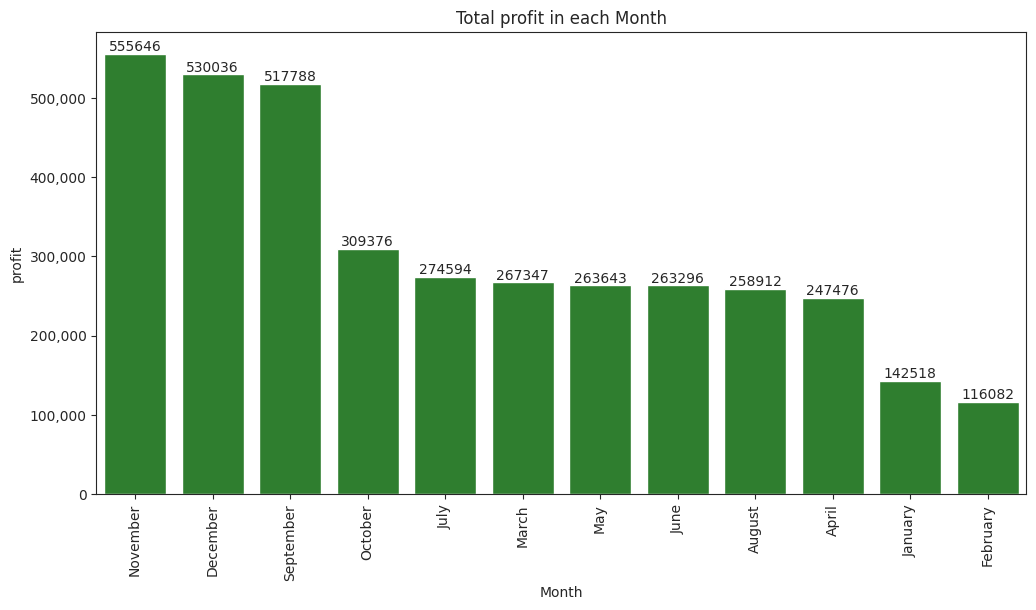

In [72]:
profit_by_month = df.groupby(["Month"])["Profit"].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=profit_by_month.index, y=profit_by_month.values,
            color="#228B22", order=df.groupby(["Month"])["Profit"].sum().sort_values(ascending=False).index)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('profit')
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_title("Total profit in each Month")

plt.show()

In [91]:
df.isnull().sum()

,0
Category,0
Sub Category,0
City,0
Region,0
Sales,0
Profit,0
State,0
Year,0
Month,0
Date,0


SPLIT DATA IN TRAINGING AND TESTING SET

In [92]:
# 2015, 2016, 2017 is training and 2018 is testing data


# Split the data
train = df[(df['Year'] >= 2015) & (df['Year'] <= 2017)]
test = df[df['Year'] == 2018]




In [93]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


categorical_cols = ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month']


for col in categorical_cols:
    le = LabelEncoder()
    le.fit(train[col])


    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train[col] = train[col].map(mapping)
    test[col] = test[col].map(mapping)


    test[col] = test[col].fillna(-1).astype(int)


scaler = MinMaxScaler()


scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)


scaled_train = pd.DataFrame(scaled_train, columns=train.columns, index=train.index)
scaled_test = pd.DataFrame(scaled_test, columns=test.columns, index=test.index)


/tmp/ipython-input-1316055929.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = train[col].map(mapping)
/tmp/ipython-input-1316055929.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = test[col].map(mapping)
/tmp/ipython-input-1316055929.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [100]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values(by=['Year', 'Month'])

monthly_sales['Date'] = pd.to_datetime(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str) + '-01')
monthly_sales = monthly_sales.set_index('Date')

# Keep only the Sales column for the time series
monthly_sales_ts = monthly_sales['Sales']

In [101]:
train_ts = monthly_sales_ts.loc['2015-01-01':'2017-12-01']
test_ts = monthly_sales_ts.loc['2018-01-01':'2018-12-01']

print("Training set shape:", train_ts.shape)
print("Testing set shape:", test_ts.shape)

Training set shape: (36,)
Testing set shape: (12,)


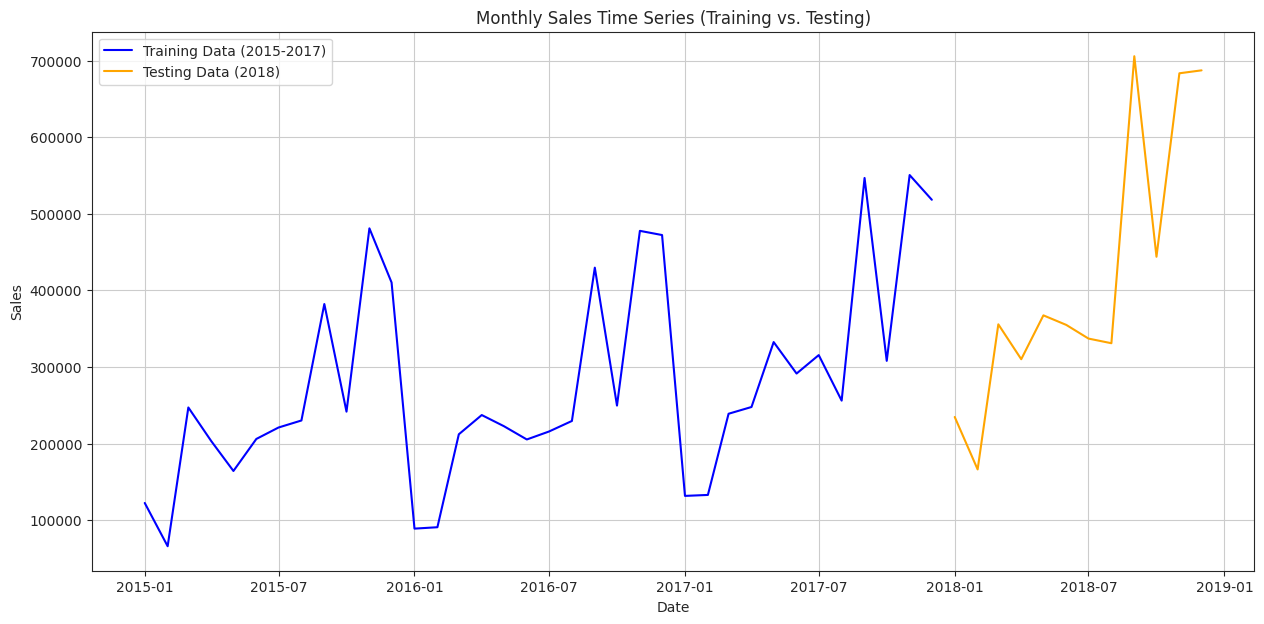

In [102]:
plt.figure(figsize=(15, 7))
plt.plot(train_ts.index, train_ts.values, label='Training Data (2015-2017)', color='blue')
plt.plot(test_ts.index, test_ts.values, label='Testing Data (2018)', color='orange')
plt.title('Monthly Sales Time Series (Training vs. Testing)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [103]:
# Fit ARIMA model
model = ARIMA(train['Sales'], order=(1,1,1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 6681
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -51965.118
Date:                Sun, 09 Nov 2025   AIC                         103936.236
Time:                        18:06:04   BIC                         103956.657
Sample:                             0   HQIC                        103943.289
                               - 6681                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0055      0.012      0.445      0.656      -0.019       0.030
ma.L1         -0.9999      0.004   -228.420      0.000      -1.009      -0.991
sigma2      3.341e+05   9222.302     36.228      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


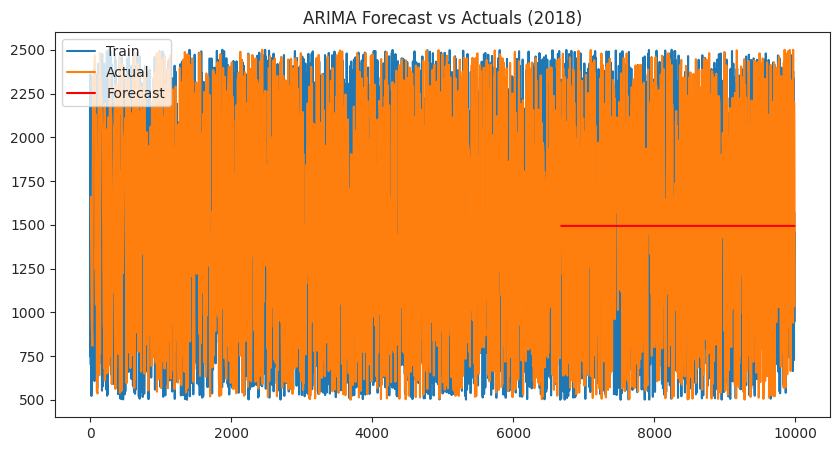

In [104]:
# Forecast for the length of the test period
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actuals (2018)')
plt.legend()
plt.show()


In [110]:
forecast.fillna(forecast.mean(), inplace=True)

rmse = np.sqrt(mean_squared_error(test['Sales'], forecast))
mae = mean_absolute_error(test['Sales'], forecast)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 576.80
MAE: 497.75
